<font color='red'><h2>Descrição do dataset</h2></font>

O dataset contém dados de clientes de um aplicativo de comida. Os produtos vendidos são separados em 5 categorias: Vinhos, Carnes, Frutas Exóticas, Peixes e Doces. Esses produtos ainda podem ser classificados como produtos "Ouro" e "Regular". Os produtos podem ser adquiridos de 3 formas, Lojas Físicas, Catálogo e Site da companhia. A dos gastos de cad com esses proutos temos dados socioeconomicos como idade, numero de filhos, estado civil, grau de instrução e renda, além de frequência com que o cliente faz pedidos, se fez alguma reclamação, e por fim, se ja aceitou alguma das campanhas que lhe foi dirigida anteriormente (1 a 5) e se aceitou a nova campanha (6) que será o target final.

Features:
- AcceptedCmp1: 1 se o cliente aceitou a oferta na 1a campanha, 0 do contrario
- AcceptedCmp2: 1 se o cliente aceitou a oferta na 2a campanha, 0 do contrario
- AcceptedCmp3: 1 se o cliente aceitou a oferta na 3a campanha, 0 do contrario
- AcceptedCmp4: 1 se o cliente aceitou a oferta na 4a campanha, 0 do contrario
- AcceptedCmp5: 1 se o cliente aceitou a oferta na 5a campanha, 0 do contrario
- Response (target) 1: 1 se o cliente aceitou a oferta na ultima campanha, 0 do contrario
- Complain: 1 se o cliente reclamou nos ultimos 2 anos
- DtCustomer: data que o cliente se cadastrou com a companhia
- Education: grau de instruçao do cliente
- Marital: estado civil do cliente
- Kidhome: numero de crianças na casa do cliente
- Teenhome: numero de adolescentes na casa do cliente
- Income: renda anual da moradia do cliente
- MntFishProducts: quantidade gasta em produtos de peixe nos ultimos 2 anos
- MntMeatProducts: quantidade gasta em produtos de carne nos ultimos 2 anos
- MntFruits: quantidade gasta em frutas nos ultimos 2 anos
- MntSweetProducts: quantidade gasta em doces nos ultimos 2 anos
- MntWines: quantidade gasta em vinhos nos ultimos 2 anos
- MntGoldProds: quantidade gasta em produtos "Ouro" nos ultimos 2 anos
- NumDealsPurchases: numero de compras feitas com desconto
- NunCatalogPurchases: numero de compras feitas usando o catalogo
- NunStorePurchases: numero de compras feitas na loja fisica
- NumWebPurchases: numero de compras feitas no website
- NumWebVisitsMonth: numero de visitas ao website no ultimo mês
- Recency: numero de dias desde a ultima compra

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<b>Existem 24 entradas com valores 0 no dataset, esses valores serão tratados posteriormente, após o tratamento de outlieres.</b>

<h1>Análise Descritiva</h1>

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df['Z_CostContact'].unique()

array([3])

In [8]:
df['Z_Revenue'].unique()

array([11])

<b>As colunas Z_CostContact e Z_Revenue não constam na descrição do dataset e possuem o mesmo valor para todas as entradas, e por esse motivo serão removidas. Além disso, a coluna ID não traz nenhuma informação relevante e também será removida.</b>

In [9]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'])

In [10]:
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: x[:4])
df['Dt_Customer'].unique()

array(['2012', '2014', '2013'], dtype=object)

In [11]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
other_categories = ["Basic", "2n Cycle"]
df['Education'].loc[df['Education'].isin(other_categories)] = 'Other'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
other_categories = ["Absurd", "Alone", "YOLO", "Married", "Together"]
df['Marital_Status'].loc[df['Marital_Status'].isin(other_categories)] = 'Other'

In [15]:
#ajustando tipos dos dados
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Dt_Customer'] = df['Dt_Customer'].astype('category')

0    1906
1     334
Name: Response, dtype: int64

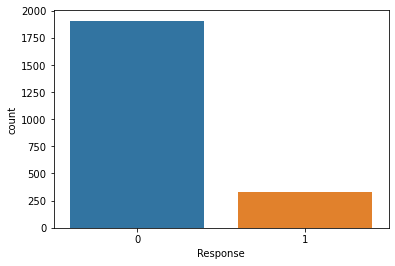

In [16]:
sns.countplot(data=df, x='Response')
df['Response'].value_counts()

<b>Dos 2240 clientes que participaram da última campanha (6a), 334 responderam positivamente à campanha, comprando o produto, e 1906 não compraram o produto. Isso nos dá um percentual de 14,91% de clientes que responderam positivamente à campanha.</b>

In [17]:
for i in range(5):
    print(f'{len(df[(df["Response"]==1) & (df["AcceptedCmp"+str(i+1)]==1)])} clientes aceitaram a campanha {i+1} e a 6')
print(f'{len(df[(df["Response"]==1) & (df["AcceptedCmp1"]==0) & (df["AcceptedCmp2"]==0) & (df["AcceptedCmp3"]==0) & (df["AcceptedCmp4"]==0) & (df["AcceptedCmp5"]==0)])} clientes não haviam comprado em nenhuma das campanhas anteriores')

79 clientes aceitaram a campanha 1 e a 6
20 clientes aceitaram a campanha 2 e a 6
77 clientes aceitaram a campanha 3 e a 6
62 clientes aceitaram a campanha 4 e a 6
92 clientes aceitaram a campanha 5 e a 6
146 clientes não haviam comprado em nenhuma das campanhas anteriores


<b>Dos clientes que compraram o produto na campanha 6, <font color='red'>23,65%</font> haviam comprado também na campanha 1, <font color='red'>6%</font> haviam comprado também na campanha 2, <font color='red'>23,05%</font> haviam comprado na campanha 3, <font color='red'>18,56%</font> haviam comprado na campanha 4 e <font color='red'>27,54%</font> haviam comprado na campanha 5. <font color='red'>43,71%</font> dos clientes que compraram na nova campanha não haviam comprado em nenhuma das campanhas anteriores.</b>

In [18]:
df['Dependents'] = df['Teenhome'] + df['Kidhome']

<AxesSubplot:xlabel='Dependents', ylabel='count'>

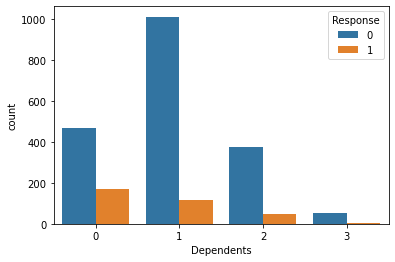

In [19]:
sns.countplot(data=df, x='Dependents', hue='Response')

<b>Aparentemente existe uma tendência maior à adquirir a campanha se a pessoa não possui dependentes (crianças ou adolescentes em casa, independente do numero, por esse motivo vamos mudar essa coluna para <font color='green'>Yes</font>, se tiver e <font color = 'red'>No</font> se não tiver.</b>

In [20]:
yes = [1, 2, 3]
no = [0]
df['Dependents'].loc[df['Dependents'].isin(yes)] = 'Yes'
df['Dependents'].loc[df['Dependents'].isin(no)] = 'No'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='Dependents', ylabel='count'>

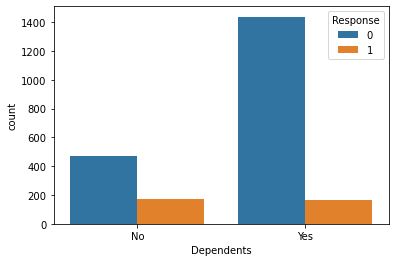

In [21]:
sns.countplot(data=df, x='Dependents', hue='Response')

In [22]:
df['Dependents'] = df['Dependents'].astype('category')

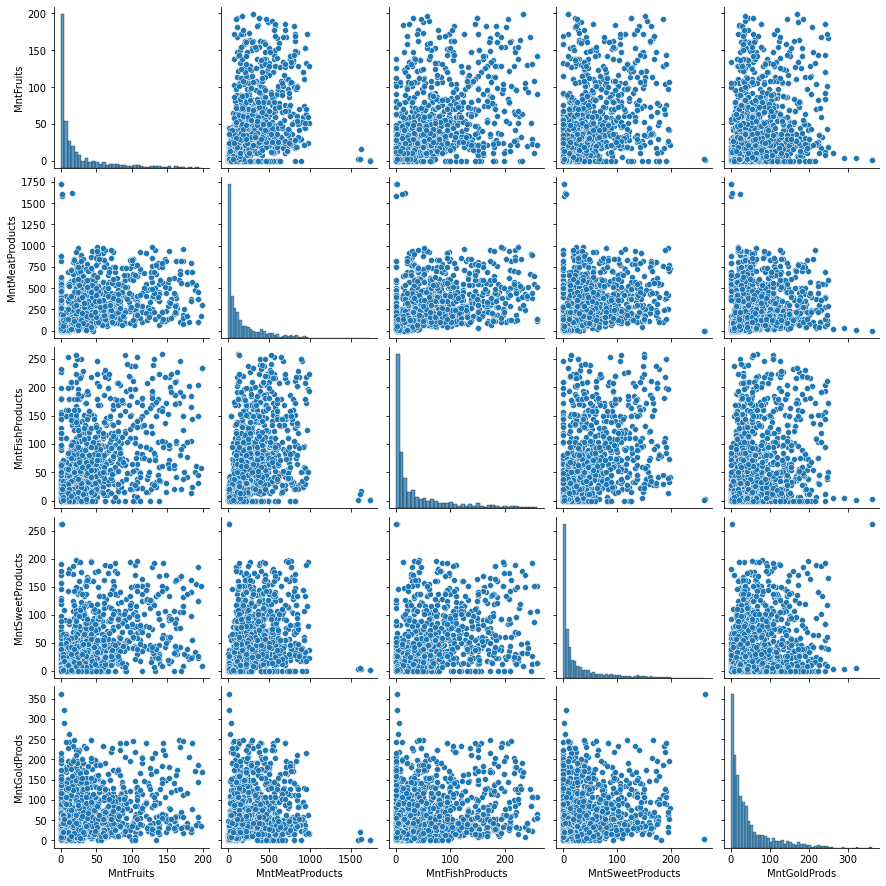

In [23]:
sns.pairplot(data=df, vars=df.columns[9:14])

<b>Os histogramas da quantia gasta em cada tipo de produto (Vinhos, Carnes, Peixes, Doces e Frutas) apresentam um desbalanço na frequência de instâncias nos preços mais baixos. Como a distribuição não é normal, aplicaremos o log nos valores para podermos visualizar melhor a distribuição dos gastos</b>

In [24]:
amnt_wines = df['MntWines'].apply(np.log10)
amnt_fruits = df['MntFruits'].apply(np.log10)
amnt_sweets = df['MntSweetProducts'].apply(np.log10)
amnt_meat = df['MntMeatProducts'].apply(np.log10)
amnt_fish = df['MntFishProducts'].apply(np.log10)

d = {'Wines':amnt_wines, 'Fruits':amnt_fruits, 'Sweets':amnt_sweets, 'Meat':amnt_meat,
                       'Fish':amnt_fish}
amnt_log = pd.DataFrame(d)

In [25]:
amnt_log

,Wines,Fruits,Sweets,Meat,Fish
0,2.802774,1.944483,1.944483,2.737193,2.235528
1,1.041393,0.000000,0.000000,0.778151,0.301030
2,2.629410,1.690196,1.322219,2.103804,2.045323
3,1.041393,0.602060,0.477121,1.301030,1.000000
4,2.238046,1.633468,1.431364,2.071882,1.662758
...,...,...,...,...,...
2235,2.850646,1.633468,2.071882,2.260071,1.623249
2236,2.608526,-inf,-inf,1.477121,-inf
2237,2.958086,1.681241,1.079181,2.336460,1.505150
2238,2.631444,1.477121,1.477121,2.330414,1.903090


In [26]:
print('Os gastos totais com cada tipo de produto são:')
print(f'{df["MntWines"].sum()} reais em Vinhos')
print(f'{df["MntMeatProducts"].sum()} reais em Carnes')
print(f'{df["MntFishProducts"].sum()} reais em Peixes')
print(f'{df["MntSweetProducts"].sum()} reais em Doces')
print(f'{df["MntFruits"].sum()} reais em Frutas')

Os gastos totais com cada tipo de produto são:
680816 reais em Vinhos
373968 reais em Carnes
84057 reais em Peixes
60621 reais em Doces
58917 reais em Frutas


<h3>Vinhos</h3>

Text(0, 0.5, 'Frequency')

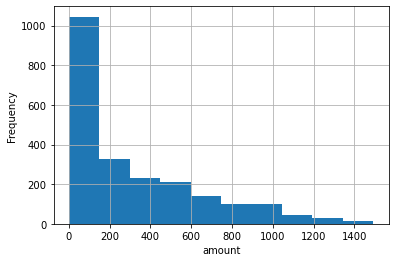

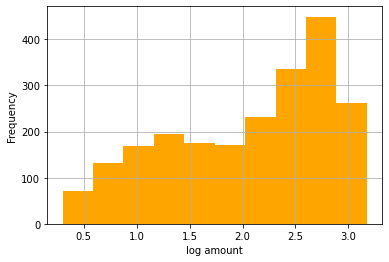

In [27]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(df['MntWines'])
ax1.grid()
ax1.set_xlabel('amount')
ax1.set_ylabel('Frequency')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(amnt_log[amnt_log['Wines']>0]['Wines'], color='orange')
ax2.grid()
ax2.set_xlabel('log amount')
ax2.set_ylabel('Frequency')


<b>No primeiro gráfico observamos que, em media, metade dos 2240 usuários cadastrados gastou até 100 reais em vinhos,
e esse número cai de forma brusca para menos de 400 usuários com gastos entre 100 e 300, e de forma geral, continua
diminuindo a medida que os valores aumentam

No gráfico do log dos gastos observamos que o gasto mais comum é na faixa dos 500 reais ao todo, enquanto a maioria
das pessoas se encontra naquela margem de 0 - 100, vemos que esse valor é bem distribuído entre varias faixas de preço
entre 10 e 100 reais. Além disso, podemos observar que cerca de 10% dos usuários estão disposto a gastar mais de 1000 reais (todos esses valores em um intervalo de 2 anos)</b>

<h3>Carnes</h3>

Text(0, 0.5, 'Frequency')

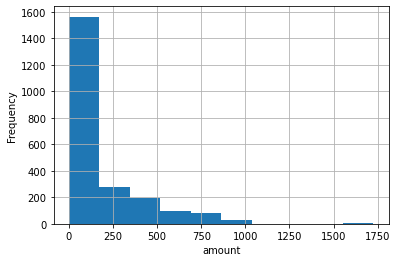

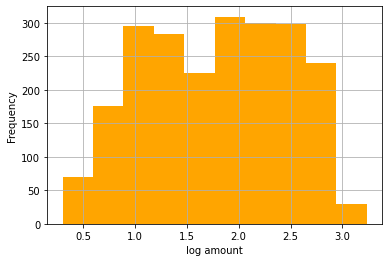

In [28]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
n, bins, patches = ax3.hist(df['MntMeatProducts'])
ax3.grid()
ax3.set_xlabel('amount')
ax3.set_ylabel('Frequency')

fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
n, bins, patches = ax4.hist(amnt_log[amnt_log['Meat']>0]['Meat'], color='orange')
ax4.grid()
ax4.set_xlabel('log amount')
ax4.set_ylabel('Frequency')


<b>A história aqui se repete, com o maior contigente de pessoas acumulado com os menores gastos (entre 0 e 200 reais). No entanto, o gráfico do log dos gastos  nos mostra um maior equilibrio entre as pessoas que gastam valores entre 10 reais até quase 500 reais, sendo que o grupo com maior gasto é de aproximadamente 100 reais, por uma margem bem pequena. Poucas pessoas estão dispostas a gastar valores acima de 1000 reais (todos esses valores em um intervalo de 2 anos).</b>

<h3>Peixes</h3>

Text(0, 0.5, 'Frequency')

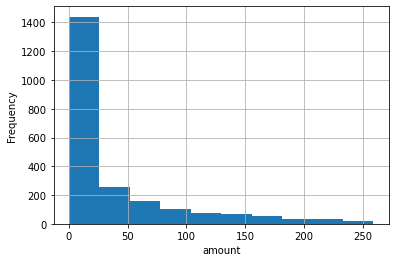

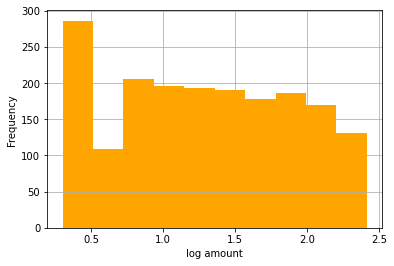

In [29]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1)
n, bins, patches = ax5.hist(df['MntFishProducts'])
ax5.grid()
ax5.set_xlabel('amount')
ax5.set_ylabel('Frequency')

fig6 = plt.figure()
ax6 = fig6.add_subplot(1, 1, 1)
n, bins, patches = ax6.hist(amnt_log[amnt_log['Fish']>0]['Fish'], color='orange')
ax6.grid()
ax6.set_xlabel('log amount')
ax6.set_ylabel('Frequency')

<b>Os gastos com peixe não são tão altos, vemos pelo gráfico do log que nenhum cliente chegando a gastar 1000 reais, com todos os valores abaixo dos 500 reais. Há novamente um equilíbrio em clientes gastando desde valores baixos, na casa das dezenas de reais até algumas centenas, no entanto a quantidade de pedidos é menor em comparação à carnes e vinhos, comprovado pelo total gasto com esse tipo de produto pelos clientes. Há também um pico alto de pessoas que gastaram valores bem abaixo de 10 reais, o que indica a pouca popularidade do produto em geral quando comparado à carnes e vinhos</b>

<h3>Doces</h3>

Text(0, 0.5, 'Frequency')

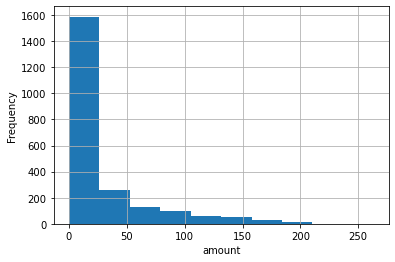

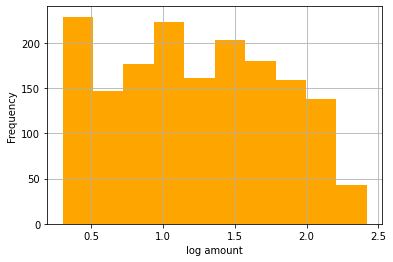

In [30]:
fig7 = plt.figure()
ax7 = fig7.add_subplot(1, 1, 1)
n, bins, patches = ax7.hist(df['MntSweetProducts'])
ax7.grid()
ax7.set_xlabel('amount')
ax7.set_ylabel('Frequency')

fig8 = plt.figure()
ax8 = fig8.add_subplot(1, 1, 1)
n, bins, patches = ax8.hist(amnt_log[amnt_log['Sweets']>0]['Sweets'], color='orange')
ax8.grid()
ax8.set_xlabel('log amount')
ax8.set_ylabel('Frequency')

<b>Por ser um produto geralmente mais barato, os valores com doces não ultrapassam também os 500 reais e mesmo os que se aproximam dos 300 reais são muito poucos clientes, com a maioria ficando entre os 10 e 100 reais. Assim como o peixe, o alto pico no começo do gráfico de log mostra que existe um grupo grande de pessoas que demonstram pouco ou nenhum interesse nesse tipo de produto.</b>

<h3>Frutas</h3>

Text(0, 0.5, 'Frequency')

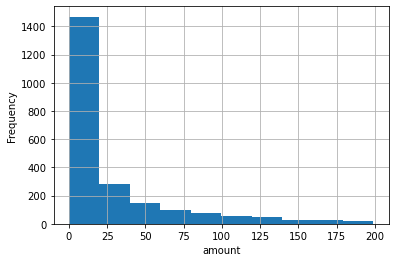

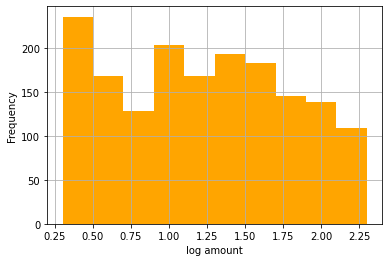

In [31]:
fig9 = plt.figure()
ax9 = fig9.add_subplot(1, 1, 1)
n, bins, patches = ax9.hist(df['MntFruits'])
ax9.grid()
ax9.set_xlabel('amount')
ax9.set_ylabel('Frequency')

fig10 = plt.figure()
ax10 = fig10.add_subplot(1, 1, 1)
n, bins, patches = ax10.hist(amnt_log[amnt_log['Fruits']>0]['Fruits'], color='orange')
ax10.grid()
ax10.set_xlabel('log amount')
ax10.set_ylabel('Frequency')

<b>Com gráficos semelhantes aos dois últimos, vemos não so que os gastos encolhem um pouco, mas que não são os produtos mais consumidos do aplicativo, e que não corresponde ao perfil de muitos clientes do serviço.</b>

<h3>Renda</h3>

In [32]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<b>Quanto à renda, temos um valor mínimo muito baixo, na casa de 1730 anual, e muito alto no máximo, 666.666. Vamos avaliar se nosso dataset possui outliers e remove-los para só depois preenchermos valores vazios</b>

<AxesSubplot:>

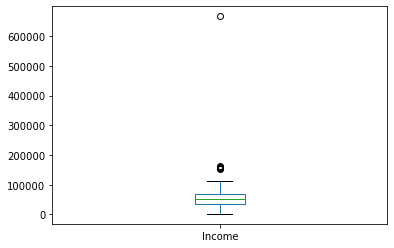

In [33]:
df['Income'].plot.box()

<b>Embora o boxplot indique uma presença clara de outliers (especialmente o valor máximo), vamos utilizando o z-score robusto</b>

<AxesSubplot:>

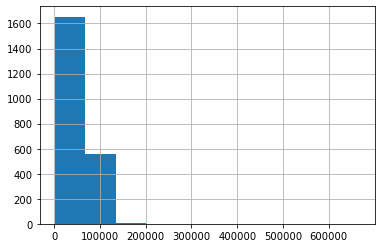

In [34]:
df['Income'].hist()

<AxesSubplot:>

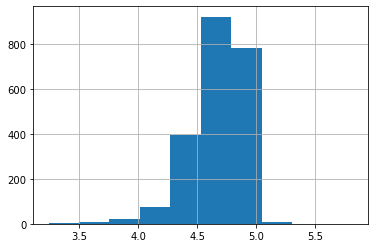

In [35]:
df['log_income'] = df['Income'].apply(np.log10)
df['log_income'].hist()

In [36]:
from numpy import abs
mad = abs(df['log_income'] - df['log_income'].median()).median()*(1/0.6745)
print(mad)

0.20658903702575981


In [37]:
df['log_income'].mad()

0.17078938446419725

<AxesSubplot:>

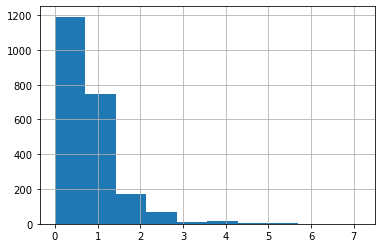

In [38]:
(abs(df['log_income']-df['log_income'].median())/mad).hist()

In [39]:
df[(abs(df['log_income']-df['log_income'].median())/mad) > 4.0]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dependents,log_income
9,1950,PhD,Other,5648.0,1,1,2014,68,28,0,...,20,1,0,0,0,0,0,0,Yes,3.751895
11,1976,Other,Other,7500.0,0,0,2012,59,6,16,...,8,0,0,0,0,0,0,0,No,3.875061
21,1979,Graduation,Other,2447.0,1,0,2013,42,1,1,...,1,0,0,0,0,0,0,0,Yes,3.388634
44,1975,Master,Other,7500.0,1,0,2013,19,3,1,...,5,0,0,0,0,0,0,0,Yes,3.875061
46,1996,Other,Other,7500.0,0,0,2012,24,3,18,...,9,0,0,0,0,0,0,1,No,3.875061
238,1973,Graduation,Single,7500.0,1,0,2013,54,5,3,...,7,0,0,0,0,0,0,0,Yes,3.875061
439,1986,Other,Other,7500.0,1,0,2013,96,1,11,...,8,0,0,0,0,0,0,0,Yes,3.875061
724,1976,Graduation,Other,7500.0,1,0,2012,19,7,0,...,9,1,0,0,0,0,0,1,Yes,3.875061
774,1957,PhD,Other,6835.0,0,1,2012,76,107,2,...,20,0,0,0,0,0,0,0,Yes,3.834739
862,1987,Graduation,Other,7500.0,0,0,2013,94,0,2,...,6,0,0,0,0,0,0,0,No,3.875061


<b>Aparentemente, até o valor 4 temos dados a ser aproveitados, vamos então selecionar valores de z-score menores ou iguais a 4, e os valores que estão vazios, para que possamos preenche-los</b>

In [40]:
df_nulls = df[df['Income'].isnull()]
df_temp = df[(abs(df['log_income']-df['log_income'].median())/mad) <= 4.0]
df = pd.concat([df_temp, df_nulls])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dependents,log_income
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,...,7,0,0,0,0,0,0,1,No,4.764460
1,1954,Graduation,Single,46344.0,1,1,2014,38,11,1,...,5,0,0,0,0,0,0,0,Yes,4.665994
2,1965,Graduation,Other,71613.0,0,0,2013,26,426,49,...,4,0,0,0,0,0,0,0,No,4.854992
3,1984,Graduation,Other,26646.0,1,0,2014,26,11,4,...,6,0,0,0,0,0,0,0,Yes,4.425632
4,1981,PhD,Other,58293.0,1,0,2014,94,173,43,...,5,0,0,0,0,0,0,0,Yes,4.765616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Other,NaN,1,1,2013,82,71,1,...,8,0,0,0,0,0,0,0,Yes,NaN
2079,1954,Master,Other,NaN,0,1,2013,83,161,0,...,6,0,0,0,0,0,0,0,Yes,NaN
2081,1955,Graduation,Single,NaN,0,1,2013,95,264,0,...,7,0,0,0,0,0,0,0,Yes,NaN
2084,1943,Master,Widow,NaN,0,0,2013,75,532,126,...,1,0,0,1,0,0,0,1,No,NaN


<b><font color='red'>Dúvida: Tive que fazer uma gambiarra feia pra nao perder os dados nulos que ia preencher, existe forma melhor de fazer isso?</font></b>

In [41]:
df_temp['Income'].describe()

count      2192.000000
mean      52450.164234
std       21118.391178
min        8028.000000
25%       35790.750000
50%       51684.000000
75%       68682.000000
max      162397.000000
Name: Income, dtype: float64

In [42]:
a1 = df_temp[df_temp['Education'] == 'Other']['Income'].mean()
b1 = df_temp[df_temp['Education'] == 'Other']['Income'].median()
print(a1)
print(b1)
print(f'{round(abs(a1-b1),2)}, diferença de {round((abs(a1-b1)/a1)*100,2)}%')
print("---")
a2 = df_temp[df_temp['Education'] == 'Graduation']['Income'].mean()
b2 = df_temp[df_temp['Education'] == 'Graduation']['Income'].median()
print(a2)
print(b2)
print(f'{round(abs(a2-b2),2)}, diferença de {round((abs(a2-b2)/a2)*100,2)}%')
print("---")
a3 = df_temp[df_temp['Education'] == 'Master']['Income'].mean()
b3 = df_temp[df_temp['Education'] == 'Master']['Income'].median()
print(a3)
print(b3)
print(f'{round(abs(a3-b3),2)}, diferença de {round((abs(a3-b3)/a3)*100,2)}%')
print("---")
a4 = df_temp[df_temp['Education'] == 'PhD']['Income'].mean()
b4 = df_temp[df_temp['Education'] == 'PhD']['Income'].median()
print(a4)
print(b4)
print(f'{round(abs(a4-b4),2)}, diferença de {round((abs(a4-b4)/a4)*100,2)}%')

42653.93548387097
36807.5
5846.44, diferença de 13.71%
---
52635.414855072464
52472.0
163.41, diferença de 0.31%
---
53170.35812672176
50943.0
2227.36, diferença de 4.19%
---
56566.553459119496
55260.0
1306.55, diferença de 2.31%


<b>Valores de media e mediana não aparentam estar muito discrepantes</b>

In [43]:
df[df['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dependents,log_income
10,1983,Graduation,Other,NaN,1,0,2013,11,5,5,...,7,0,0,0,0,0,0,0,Yes,NaN
27,1986,Graduation,Single,NaN,1,0,2013,19,5,1,...,1,0,0,0,0,0,0,0,Yes,NaN
43,1959,PhD,Single,NaN,0,0,2013,80,81,11,...,2,0,0,0,0,0,0,0,No,NaN
48,1951,Graduation,Single,NaN,2,1,2014,96,48,5,...,6,0,0,0,0,0,0,0,Yes,NaN
58,1982,Graduation,Single,NaN,1,0,2013,57,11,3,...,6,0,0,0,0,0,0,0,Yes,NaN
71,1973,Other,Other,NaN,1,0,2012,25,25,3,...,8,0,0,0,0,0,0,0,Yes,NaN
90,1957,PhD,Other,NaN,2,1,2012,4,230,42,...,9,0,0,0,0,0,0,0,Yes,NaN
91,1957,Graduation,Single,NaN,1,1,2014,45,7,0,...,7,0,0,0,0,0,0,0,Yes,NaN
92,1973,Master,Other,NaN,0,0,2013,87,445,37,...,1,0,0,0,0,0,0,0,No,NaN
128,1961,PhD,Other,NaN,0,1,2013,23,352,0,...,6,0,0,0,0,0,0,0,Yes,NaN


In [44]:
loc_other = [71, 1383, 2228]
loc_grad = [10, 27, 48, 58, 91, 133, 312, 319, 1382, 2078, 2081]
loc_master = [92, 1379, 2059, 2079, 2084]
loc_phd = [43, 90, 128, 1386, 2061]

for i in loc_other:
    df.loc[i, 'Income'] = b1
    
for i in loc_grad:
    df.loc[i, 'Income'] = b2
    
for i in loc_master:
    df.loc[i, 'Income'] = b3
    
for i in loc_phd:
    df.loc[i, 'Income'] = b4

In [45]:
df['Income'].describe()

count      2216.000000
mean      52432.034973
std       21012.094684
min        8028.000000
25%       35860.000000
50%       51912.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [46]:
df['Income'].isnull().sum()

0

<AxesSubplot:>

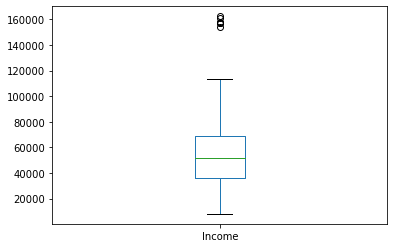

In [47]:
df['Income'].plot.box()

In [48]:
df['Income_Group'] = pd.qcut(df['Income'],4)

In [49]:
df['Income_Group'].value_counts()

(51912.0, 68487.0]     555
(8027.999, 35860.0]    555
(68487.0, 162397.0]    553
(35860.0, 51912.0]     553
Name: Income_Group, dtype: int64

<AxesSubplot:xlabel='Income_Group', ylabel='count'>

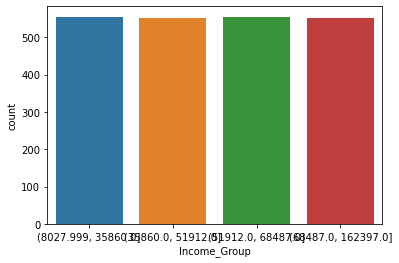

In [50]:
sns.countplot(data=df, x='Income_Group')

<h3>Idade</h3>

In [51]:
#Adiciona a coluna idade
df['Age'] = df['Year_Birth'].apply(lambda x: 2014 - int(x))

#Colunas irrelevantes para o restante da análise
df =df.drop(columns=['log_income', 'Year_Birth'])

In [52]:
df['Age'].describe()

count    2216.000000
mean       45.265794
std        11.981220
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

<AxesSubplot:>

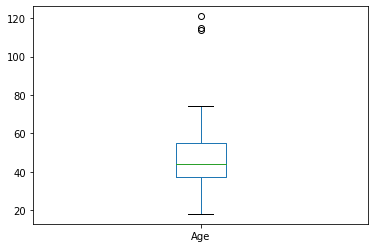

In [53]:
df['Age'].plot.box()

<AxesSubplot:>

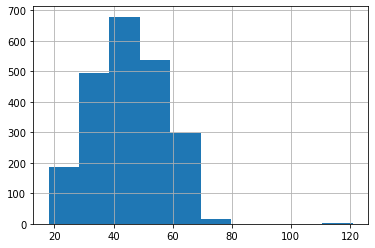

In [54]:
df['Age'].hist()

<b>Como a idade ja apresenta uma distribuição normal, podemos aplicar o método do z-score robusto</b> 

In [55]:
mad = abs(df['Age'] - df['Age'].median()).median()*(1/0.6745)
print(mad)

13.343217197924389


<AxesSubplot:>

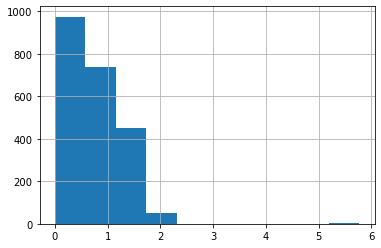

In [56]:
(abs(df['Age']-df['Age'].median())/mad).hist()

<b>Aparentemente, até o valor 2.5 temos dados a ser aproveitados, vamos então selecionar valores de z-score menores ou iguais a 2.5, e os valores que estão vazios, para que possamos preenche-los</b>

In [57]:
df[(abs(df['Age']-df['Age'].median())/mad) > 2.5]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dependents,Income_Group,Age
192,Other,Divorced,36640.0,1,0,2013,99,15,6,8,...,0,0,0,0,0,1,0,Yes,"(35860.0, 51912.0]",114
239,Other,Single,60182.0,0,1,2014,23,8,0,5,...,0,0,0,0,0,0,0,Yes,"(51912.0, 68487.0]",121
339,PhD,Other,83532.0,0,0,2013,36,755,144,562,...,0,0,1,0,0,0,0,No,"(68487.0, 162397.0]",115


In [58]:
df = df[(abs(df['Age']-df['Age'].median())/mad) <= 2.5]

<AxesSubplot:>

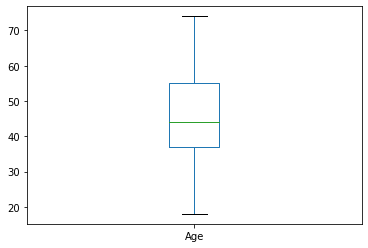

In [59]:
df['Age'].plot.box()

In [60]:
df['Age_Group'] = pd.qcut(df['Age'],4)

In [61]:
df['Age_Group'].value_counts()

(17.999, 37.0]    595
(44.0, 55.0]      553
(37.0, 44.0]      551
(55.0, 74.0]      514
Name: Age_Group, dtype: int64

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

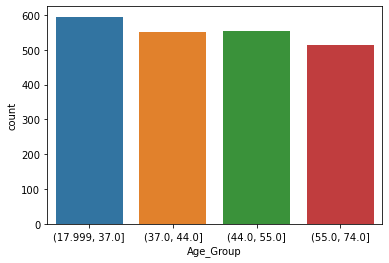

In [62]:
sns.countplot(data=df, x='Age_Group')

<b>Discretizamos a idade para visualizarmos 4 grupos, dos quais todos possuem entre 500 e 600 pessoas. Vemos que embora o grupo com mais pessoas seja entre 18 e 37, o grupo entre 37 e 44 possui uma diferença de idade de apenas 7 anos, enquanto o primeiro grupo tem uma diferença de idade de 19 anos.</b> 

<h3>Campanhas Anteriores</h3>

In [63]:
#Proporção de campanhas aceitas
proportion_arr = [0]* len(df)


for i in range(len(df)):
    proportion_arr[i] = sum(df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].iloc[i,:])/5
    
    
df["Prop_Cmps"] = proportion_arr

<AxesSubplot:>

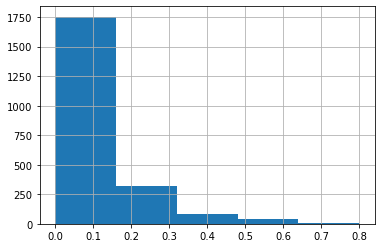

In [64]:
df['Prop_Cmps'].hist(bins=5)

<b>Enquanto a maioria das pessoas nao aceitou entre 0 e 2 campanhas, há um numero consideravel de pessoas que aceitaram até 3, o que nos leva a crer que algumas pessoas podem ter maior predisposição à aceitar essas campanhas</b>

<h3>Normalização</h3>

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2228
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2213 non-null   category
 1   Marital_Status       2213 non-null   category
 2   Income               2213 non-null   float64 
 3   Kidhome              2213 non-null   int64   
 4   Teenhome             2213 non-null   int64   
 5   Dt_Customer          2213 non-null   category
 6   Recency              2213 non-null   int64   
 7   MntWines             2213 non-null   int64   
 8   MntFruits            2213 non-null   int64   
 9   MntMeatProducts      2213 non-null   int64   
 10  MntFishProducts      2213 non-null   int64   
 11  MntSweetProducts     2213 non-null   int64   
 12  MntGoldProds         2213 non-null   int64   
 13  NumDealsPurchases    2213 non-null   int64   
 14  NumWebPurchases      2213 non-null   int64   
 15  NumCatalogPurchases  

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [67]:
df[['Income','Recency','MntFruits', 'MntMeatProducts', 'MntGoldProds', 
    'MntWines', 'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'Age']] = scaler.fit_transform(df[['Income','Recency','MntFruits', 'MntMeatProducts', 'MntGoldProds', 
                                                                                 'MntWines', 'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchases', 
                                                                                 'NumWebPurchases', 'NumCatalogPurchases', 
                                                                                 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']])

In [68]:
df['Education'] = df['Education'].cat.codes
df['Marital_Status'] = df['Marital_Status'].cat.codes
df['Dt_Customer'] = df['Dt_Customer'].cat.codes
df['Dependents'] = df['Dependents'].cat.codes

In [69]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dependents,Income_Group,Age,Age_Group,Prop_Cmps
0,0,2,0.324612,0,0,0,0.585859,0.425318,0.442211,0.316522,...,0,0,0,0,1,0,"(51912.0, 68487.0]",0.696429,"(55.0, 74.0]",0.0
1,0,2,0.248210,1,1,2,0.383838,0.007368,0.005025,0.003478,...,0,0,0,0,0,1,"(35860.0, 51912.0]",0.750000,"(55.0, 74.0]",0.0
2,0,1,0.411903,0,0,1,0.262626,0.285332,0.246231,0.073623,...,0,0,0,0,0,0,"(68487.0, 162397.0]",0.553571,"(44.0, 55.0]",0.0
3,0,1,0.120607,1,0,2,0.262626,0.007368,0.020101,0.011594,...,0,0,0,0,0,1,"(8027.999, 35860.0]",0.214286,"(17.999, 37.0]",0.0
4,3,1,0.325616,1,0,2,0.949495,0.115874,0.216080,0.068406,...,0,0,0,0,0,1,"(51912.0, 68487.0]",0.267857,"(17.999, 37.0]",0.0


In [70]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [71]:
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Dependents             0
Income_Group           0
Age                    0
Age_Group              0
Prop_Cmps              0
dtype: int64

<AxesSubplot:>

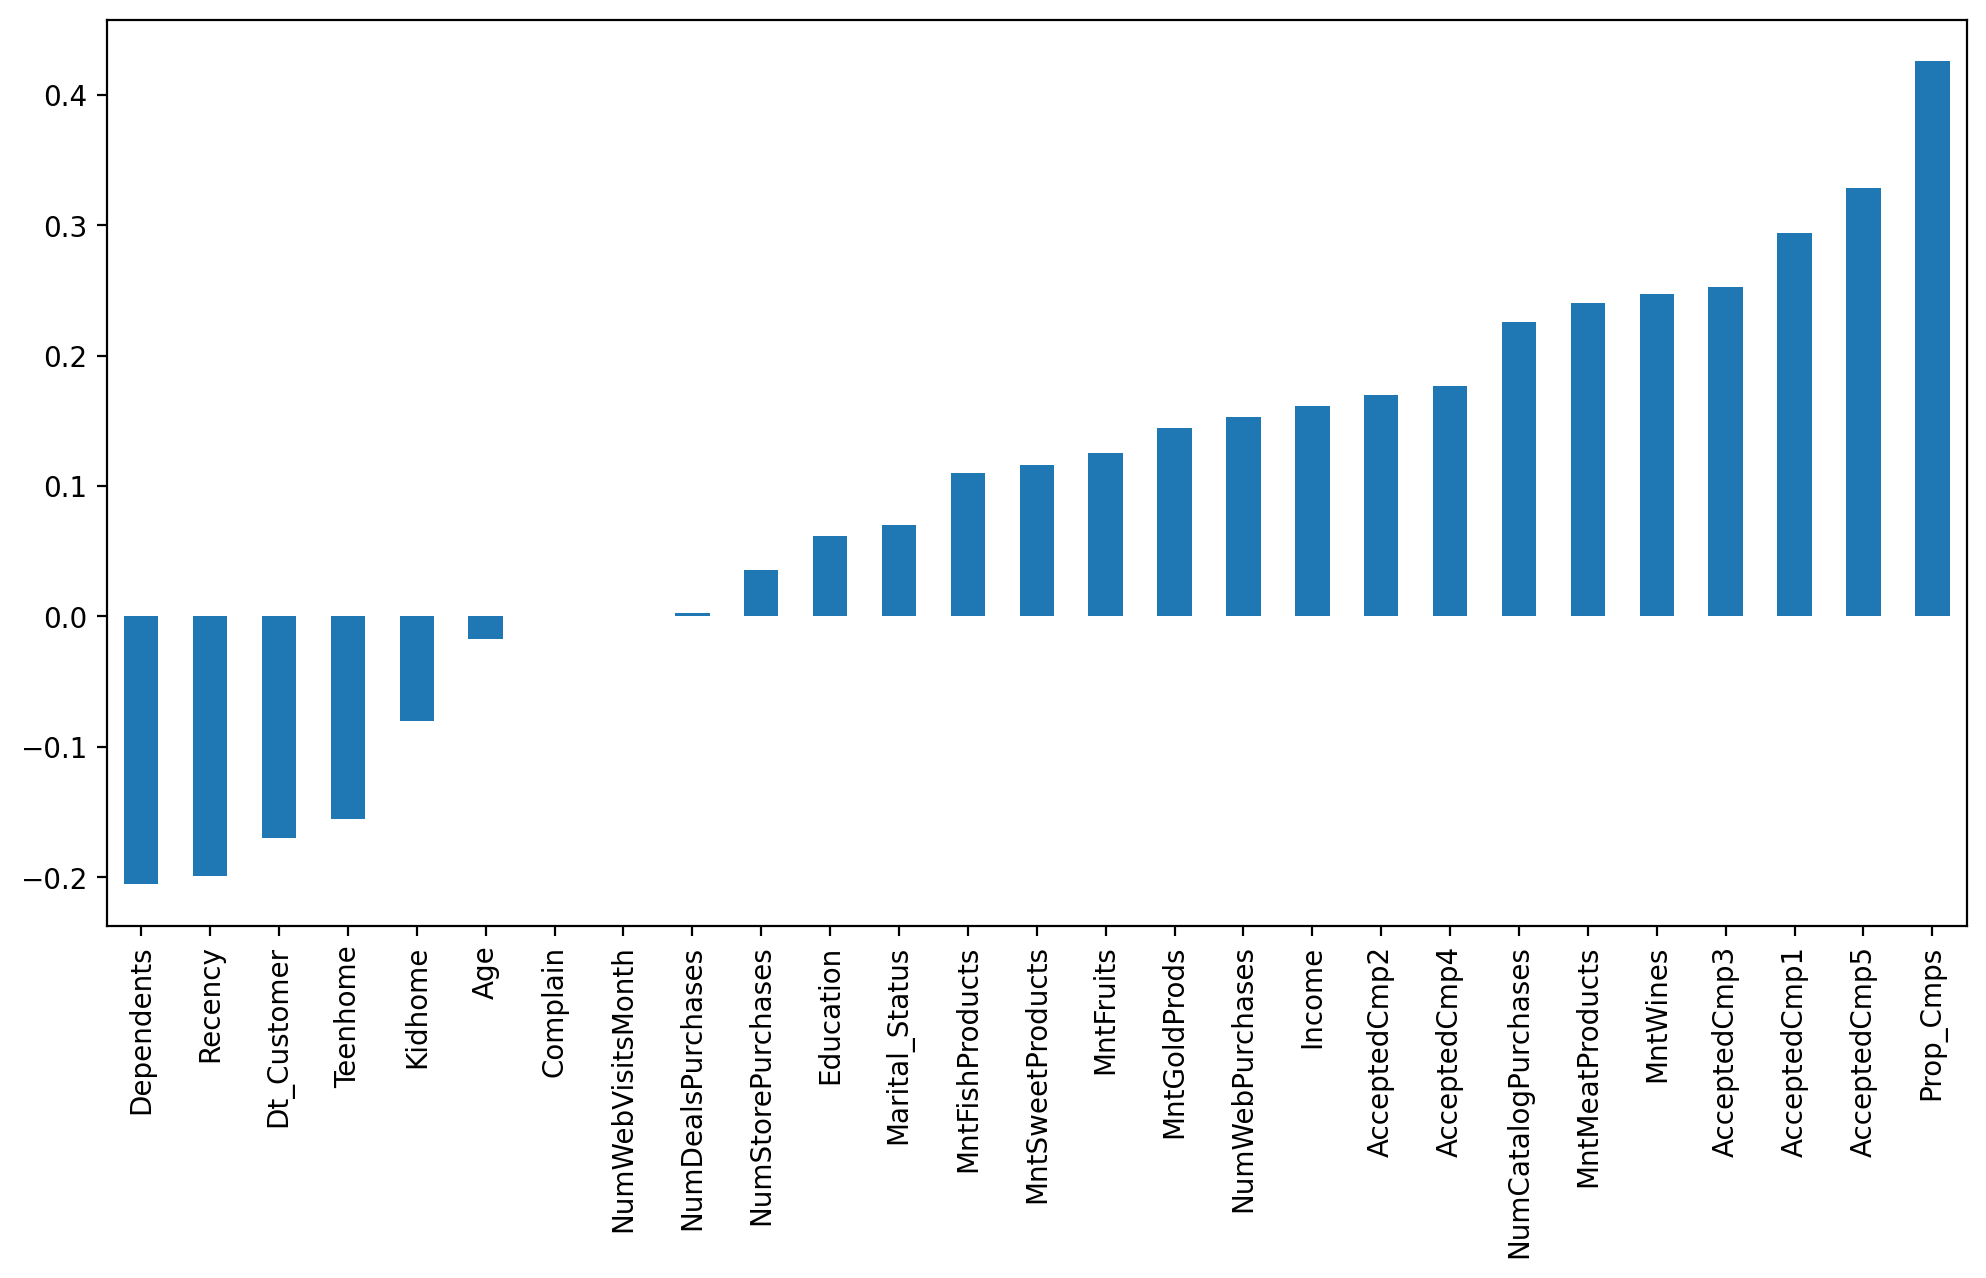

In [72]:
plt.figure(figsize=(12,6),dpi=200)
df.corr()['Response'].sort_values().iloc[:-1].plot(kind='bar')

In [73]:
df_X = df.drop(columns=['Teenhome', 'Kidhome','Complain', 'NumWebVisitsMonth', 'Income_Group', 
                           'NumDealsPurchases', 'NumStorePurchases', 'Education', 'Marital_Status', 'Age_Group'])
df_y = df['Response']

In [102]:
df_X.head()

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Dependents,Age,Prop_Cmps
0,0.324612,0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.296296,0.357143,0,0,0,0,0,1,0,0.696429,0.0
1,0.248210,2,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.037037,0.035714,0,0,0,0,0,0,1,0.750000,0.0
2,0.411903,1,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.296296,0.071429,0,0,0,0,0,0,0,0.553571,0.0
3,0.120607,2,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.074074,0.000000,0,0,0,0,0,0,1,0.214286,0.0
4,0.325616,2,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.185185,0.107143,0,0,0,0,0,0,1,0.267857,0.0


In [103]:
df_y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

<h2>Classificação</h2>

<h3>Separaçao de dados em treino e teste</h3>

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = df_X
y = df_y
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

<font color='blue'><h2>Gaussian Naive Bayes</h2></font>

In [107]:
from sklearn.naive_bayes import GaussianNB

In [108]:
gnb = GaussianNB()

In [109]:
param_grid = [
    {'priors': [None],
     'var_smoothing': np.logspace(0,-9, num=30)
    }
]

In [110]:
grid = GridSearchCV(gnb, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [111]:
best_clf = grid.fit(X,y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [112]:
best_clf.best_estimator_

GaussianNB(var_smoothing=0.006723357536499335)

In [113]:
# varia o n de 1 à 10^-9 em 30 partes igualmente distantes
n_range = np.logspace(0,-9, num=30)

n_scores = []

for n in n_range:
    gnb = GaussianNB(var_smoothing=n)
    scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
    n_scores.append(scores.mean())
print(n_scores)

[0.8775447393094453, 0.9236354001059883, 0.9756002608943785, 0.9959316782846195, 0.9963821287350699, 0.9995495495495496, 0.9995495495495496, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

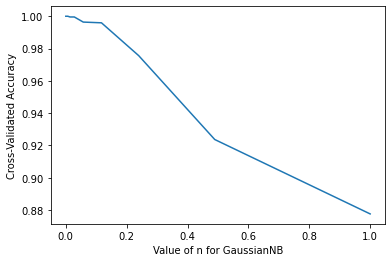

In [114]:
plt.plot(n_range, n_scores)
plt.xlabel('Value of n for GaussianNB')
plt.ylabel('Cross-Validated Accuracy')

In [115]:
gnb = GaussianNB(var_smoothing=0.006)
gnb.fit(Xtrain, ytrain)
y_model = gnb.predict(Xtest)
ypred_train = gnb.predict(Xtrain)

In [116]:
from sklearn.metrics import accuracy_score
print("ACC TRAINING: " + str(round(accuracy_score(ytrain, ypred_train)*100,2)) + "%")
print("ACC TEST :" + str(round(accuracy_score(ytest, y_model)*100,2)) + "%")

ACC TRAINING: 100.0%
ACC TEST :100.0%


<b>O modelo mostra-se ideal, com acurácia de treino e teste de 100%</b>

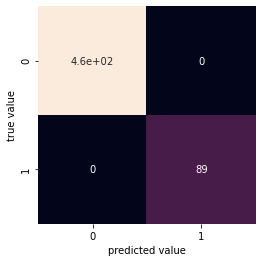

In [117]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [118]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       1.00      1.00      1.00        89

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



<font color='blue'><h2>KNN</h2></font>

In [119]:
X = df_X
y = df_y
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier()

In [122]:
param_grid = [
    {'n_neighbors': range(1,11),
     'algorithm': ['auto']
    }
]

In [123]:
grid = GridSearchCV(knn, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [124]:
best_clf = grid.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [125]:
best_clf.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [126]:
# varia o k de 1 a 30
k_range = range(1, 11)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9977395947984183, 0.9954812278341689, 0.9981941217235335, 0.998644572173984, 0.9981941217235335, 0.9977416330357507, 0.9981941217235335, 0.9977416330357507, 0.9972891443479679, 0.9977395947984183]


Text(0, 0.5, 'Cross-Validated Accuracy')

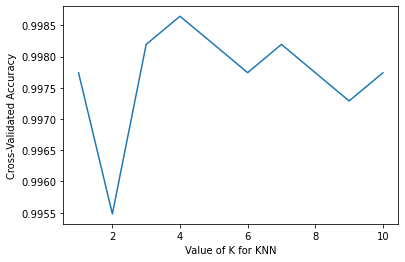

In [127]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [129]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain, ytrain)
y_model = knn.predict(Xtest)
ypred_train = knn.predict(Xtrain)

In [130]:
from sklearn.metrics import accuracy_score
print("ACC TRAINING: " + str(round(accuracy_score(ytrain, ypred_train)*100,2)) + "%")
print("ACC TEST :" + str(round(accuracy_score(ytest, y_model)*100,2)) + "%")

ACC TRAINING: 99.82%
ACC TEST :98.92%


<b>O modelo mostra-se ideal, com acurácia de treino e teste proximos de 100%</b>

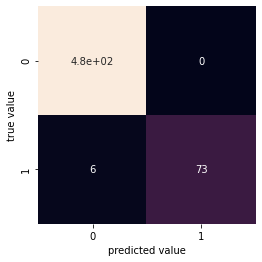

In [131]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [132]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       475
           1       1.00      0.92      0.96        79

    accuracy                           0.99       554
   macro avg       0.99      0.96      0.98       554
weighted avg       0.99      0.99      0.99       554



<font color='blue'><h2>Decision Tree</h2></font>

In [133]:
X = df_X
y = df_y
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dtree = DecisionTreeClassifier()

In [136]:
param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9 ,10],
     'criterion': ['gini', 'entropy'],
     'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9 ,10],
     'min_samples_leaf' : [2, 3, 4, 5, 6, 7, 8, 9 ,10]
    }
]

In [137]:
grid = GridSearchCV(dtree, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [138]:
best_clf = grid.fit(X,y)

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [139]:
best_clf.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

<b> O Modelo ideal encontrado pelo grid search foi com profundidade maxima de 2, e o minimo de 2 elementos por folha</b>

In [141]:
dtree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
dtree.fit(Xtrain, ytrain)
y_model = dtree.predict(Xtest)
ypred_train = dtree.predict(Xtrain)

In [142]:
# varia o max depth de 2 a 10
max_depth = range(2, 10)

md_scores = []

for m in max_depth:
    dtree = DecisionTreeClassifier(max_depth=m)
    scores = cross_val_score(dtree, X, y, cv=10, scoring='accuracy')
    md_scores.append(scores.mean())
print(md_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

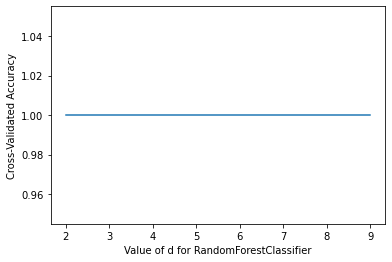

In [143]:
plt.plot(max_depth, md_scores)
plt.xlabel('Value of d for RandomForestClassifier')
plt.ylabel('Cross-Validated Accuracy')

In [144]:
from sklearn.metrics import accuracy_score
print("ACC TRAINING: " + str(round(accuracy_score(ytrain, ypred_train)*100,2)) + "%")
print("ACC TEST :" + str(round(accuracy_score(ytest, y_model)*100,2)) + "%")

ACC TRAINING: 100.0%
ACC TEST :100.0%


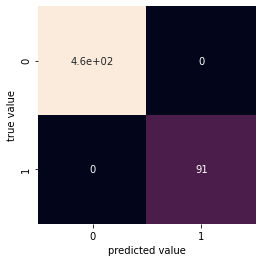

In [145]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [146]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       463
           1       1.00      1.00      1.00        91

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



<font color='blue'><h2>Random Forest</h2></font>

In [147]:
X = df_X
y = df_y
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfc = RandomForestClassifier()

In [150]:
param_grid = [
    {'criterion': ['gini', 'entropy'],
     'max_depth': [2, 3, 4, 5, 6, 7, 8, 9 ,10],
     'min_samples_split': [2, 3, 4, 5],
     'min_samples_leaf' : [2, 3, 4, 5]
    }
]

In [151]:
grid = GridSearchCV(rfc, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [152]:
best_clf = grid.fit(X,y)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


In [153]:
best_clf.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=2)

In [154]:
# varia o d de 1 a 10
d_range = range(1, 11)

d_scores = []

for d in d_range:
    rfc = RandomForestClassifier(max_depth=d)
    scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())
print(d_scores)

[0.8676022176022178, 0.9313093636623048, 0.9800925359748888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated Accuracy')

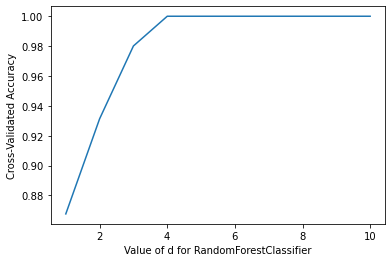

In [155]:
plt.plot(d_range, d_scores)
plt.xlabel('Value of d for RandomForestClassifier')
plt.ylabel('Cross-Validated Accuracy')

In [157]:
rfc = RandomForestClassifier(max_depth=4,min_samples_leaf=2)
rfc.fit(Xtrain, ytrain)
y_model = rfc.predict(Xtest)
ypred_train = rfc.predict(Xtrain)

In [158]:
from sklearn.metrics import accuracy_score
print("ACC TRAINING: " + str(round(accuracy_score(ytrain, ypred_train)*100,2)) + "%")
print("ACC TEST :" + str(round(accuracy_score(ytest, y_model)*100,2)) + "%")

ACC TRAINING: 100.0%
ACC TEST :100.0%


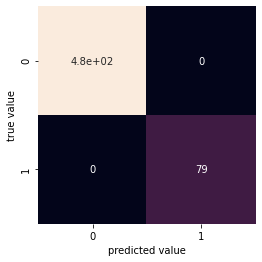

In [159]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [160]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       475
           1       1.00      1.00      1.00        79

    accuracy                           1.00       554
   macro avg       1.00      1.00      1.00       554
weighted avg       1.00      1.00      1.00       554



<b>Todos os modelos mostraram-se bastante eficientes, com baixo viés e baixa variância, apresentando uma precisao de aproximadamente 85% (Naive Bayes e Random Forest) quando não otimizados, mas todos chegando a 99-100% com desempenho semelhante e proximo do ideal, de modo que todos são bons modelos para classificação desse problema</b>

In [ ]:
df_analysis = pd.concat([df_X, df_y], axis=1)

In [ ]:
df_analysis.to_csv(index=False)

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df_analysis.to_csv('out.zip', index=False,
          compression=compression_opts)  